# ASSIGNMENT 1: SUPERVISED AND UNSUPERVISED LEARNING
This assignment will cover the various models taught in class that are regularly used for supervised and unsupervised learning.

Recall that Supervised Learning is the paradigm of machine learning that makes use of data labels for training, along with the data features, while  unsupervised relies only on data features.


**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [21]:
# ENTER YOUR CODE HERE
import pandas as pd
import numpy as np


## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.
- Classification: The output labels are discrete in nature.

We'll begin with classification. Recall some of the models taught for the same- **Logistic Regression, Support Vector Machine, KNN, Naive Bayes, Decision Trees and Random Forests**

### BINARY CLASSIFICATION

In [22]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 86.3MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [23]:
# ENTER YOUR CODE HERE
df=pd.read_csv('nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [24]:
#ENTER YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [25]:
#ENTER YOUR CODE HERE
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [26]:
#ENTER YOUR CODE HERE
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [27]:
#ENTER YOUR CODE HERE
df.dropna(inplace=True)

**What is the shape of the dataframe now?**

In [28]:
#ENTER YOUR CODE HERE
print("Shape of the dataframe post dropping rows with NaN values is: ")
df.shape

Shape of the dataframe post dropping rows with NaN values is: 


(1329, 21)

Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [29]:
#ENTER YOUR CODE HERE
X=df.drop(['Name','TARGET_5Yrs'],axis=1)
y=df['TARGET_5Yrs']
print(f"The shape of the features datafarme is: {X.shape}")
print(f"The shape of the labels datafarme is: {y.shape}")

The shape of the features datafarme is: (1329, 19)
The shape of the labels datafarme is: (1329,)


The shape of the features datafarme is: (1329, 19)
The shape of the labels dataframe is: (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [30]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split


**Now divide the features and label dataframes into train and test splits.**

In [31]:
#ENTER YOUR CODE HERE
X_train,X_test,y_train, y_test = train_test_split(X,y,random_state=32,test_size=0.20)
print(f"The shape of training features dataframe is: {X_train.shape}")
print(f"The shape of testing features dataframe is: {X_test.shape}")
print(f"The shape of training labels dataframe is: {y_train.shape}")
print(f"The shape of test labels dataframe is: {y_test.shape}")
print(f"The train-to-test split ratio is: {1063/266}")

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [32]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LogisticRegression


**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [33]:
#ENTER YOUR CODE HERE
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [34]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [35]:
#ENTER YOUR CODE HERE
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model is: ", acc)

f1 = f1_score(y_test, y_pred)
print("F1 score of the model is: ", f1)

prec = precision_score(y_test, y_pred)
print("Precision of the model is: ", prec)

recall = recall_score(y_test, y_pred)
print("Recall of the model is: ", recall)

Accuracy of the model is:  0.7406015037593985
F1 score of the model is:  0.8034188034188036
Precision of the model is:  0.7790055248618785
Recall of the model is:  0.8294117647058824


Accuracy of the model is: 0.6992481203007519
F1 score of the model is: 0.7727272727272728
Precision of the model is: 0.7513812154696132
Recall of the model is: 0.7953216374269005


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [36]:
#ENTER YOUR CODE HERE
from sklearn import svm

**Just as we had before, load and fit a model on our training dataset.**

In [37]:
#ENTER YOUR CODE HERE
model2 = svm.SVC(kernel='linear')
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [38]:
#ENTER YOUR CODE HERE
acc = accuracy_score(y_test, y_pred2)
print("Accuracy of the model is: ", acc)

f1 = f1_score(y_test, y_pred2)
print("F1 score of the model is: ", f1)

prec = precision_score(y_test, y_pred2)
print("Precision of the model is: ", prec)

recall = recall_score(y_test, y_pred2)
print("Recall of the model is: ", recall)

Accuracy of the model is:  0.7218045112781954
F1 score of the model is:  0.7921348314606742
Precision of the model is:  0.7580645161290323
Recall of the model is:  0.8294117647058824


Accuracy of the model is: 0.7030075187969925
F1 score of the model is: 0.7835616438356164
Precision of the model is: 0.7371134020618557
Recall of the model is: 0.8362573099415205


### MULTICLASS CLASSIFICATION

In [44]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 72.8MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [45]:
#ENTER YOUR CODE HERE
df=pd.read_csv('social_well_being.csv')

**Always analyse the data.**

In [46]:
#ENTER YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [47]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [48]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [49]:
#ENTER YOUR CODE HERE
print(f"The classes are: {list(df['Dominant_Emotion'].unique())}")

The classes are: ['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness']


The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [50]:
#ENTER YOUR CODE HERE
print(f"The genders are: {list(df['Gender'].unique())}")
print(f"The platforms used are: {list(df['Platform'].unique())}")

The genders are: ['Female', 'Male', 'Non-binary']
The platforms used are: ['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp', 'Telegram', 'Snapchat']


The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [51]:
#ENTER YOUR CODE HERE
from pandas import get_dummies

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [52]:
#ENTER YOUR CODE HERE
df1 = pd.get_dummies(df,columns = ['Gender'],dtype=int)
df1.rename(columns = {'Gender_Female':'Female','Gender_Male':'Male','Gender_Non-binary':'Non-Binary'}, inplace = True)
df1

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-Binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [53]:
#ENTER YOUR CODE HERE
df2 = pd.get_dummies(df1,columns = ['Platform'],dtype=int)
df2.rename(columns = {'Platform_Facebook':'Facebook','Platform_Instagram':'Instagram','Platform_LinkedIn':'LinkedIn','Platform_Snapchat':'Snapchat','Platform_Telegram':'Telegram','Platform_Twitter':'Twitter','Platform_Whatsapp':'Whatsapp'}, inplace = True)
df2

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-Binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [54]:
#ENTER YOUR CODE HERE
from sklearn import preprocessing

**Now label encode the column 'Dominant_Emotion'**

In [55]:
#ENTER YOUR CODE HERE
labelEncoder = preprocessing.LabelEncoder()
df2['Dominant_Emotion_Encoded']= labelEncoder.fit_transform(df2['Dominant_Emotion'])
df2=df2.drop(['Dominant_Emotion'],axis=1)
df2

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-Binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [56]:
#ENTER YOUR CODE HERE
X=df2.drop(['User_ID','Dominant_Emotion_Encoded'],axis=1)
y=df2['Dominant_Emotion_Encoded']


X_train,X_test,y_train, y_test = train_test_split(X,y,random_state=32,test_size=0.20)
print(f"The shape of training features dataframe is: {X_train.shape}")
print(f"The shape of testing features dataframe is: {X_test.shape}")
print(f"The shape of training labels dataframe is: {y_train.shape}")
print(f"The shape of test labels dataframe is: {y_test.shape}")
print(f"The train-to-test split ratio is: {739/185}")

The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [57]:
#ENTER YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [58]:
#ENTER YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [59]:
#ENTER YOUR CODE HERE
y_pred=knn.predict(X_test)
df3=pd.DataFrame({'Dominant_Emotion_Encoded_Predicted':y_pred})
df3

,Dominant_Emotion_Encoded_Predicted
0,1
1,0
2,4
3,0
4,3
...,...
180,1
181,0
182,5
183,4


,Dominant_Emotion_Encoded_Predicted
0,5
1,5
2,1
3,1
4,4
...,...
180,4
181,1
182,5
183,3


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [60]:
#ENTER YOUR CODE HERE
list(labelEncoder.inverse_transform(df3['Dominant_Emotion_Encoded_Predicted']))

['Anxiety',
 'Anger',
 'Neutral',
 'Anger',
 'Happiness',
 'Boredom',
 'Happiness',
 'Neutral',
 'Sadness',
 'Anger',
 'Neutral',
 'Neutral',
 'Boredom',
 'Anger',
 'Boredom',
 'Anxiety',
 'Anxiety',
 'Anger',
 'Boredom',
 'Neutral',
 'Happiness',
 'Neutral',
 'Sadness',
 'Neutral',
 'Neutral',
 'Anxiety',
 'Sadness',
 'Neutral',
 'Happiness',
 'Neutral',
 'Boredom',
 'Anxiety',
 'Neutral',
 'Sadness',
 'Happiness',
 'Sadness',
 'Neutral',
 'Neutral',
 'Anger',
 'Anger',
 'Happiness',
 'Neutral',
 'Sadness',
 'Happiness',
 'Sadness',
 'Sadness',
 'Happiness',
 'Anxiety',
 'Anger',
 'Anxiety',
 'Anxiety',
 'Anxiety',
 'Happiness',
 'Boredom',
 'Anxiety',
 'Neutral',
 'Neutral',
 'Happiness',
 'Anxiety',
 'Neutral',
 'Anger',
 'Happiness',
 'Anger',
 'Happiness',
 'Boredom',
 'Happiness',
 'Happiness',
 'Anxiety',
 'Sadness',
 'Sadness',
 'Anxiety',
 'Boredom',
 'Sadness',
 'Anxiety',
 'Anxiety',
 'Happiness',
 'Happiness',
 'Sadness',
 'Neutral',
 'Neutral',
 'Sadness',
 'Neutral',
 'Sa

['Sadness' 'Sadness' 'Anxiety' 'Anxiety' 'Neutral' 'Sadness' 'Anxiety'
 'Anxiety' 'Neutral' 'Neutral' 'Happiness' 'Sadness' 'Anxiety' 'Happiness'
 'Sadness' 'Neutral' 'Neutral' 'Sadness' 'Neutral' 'Sadness' 'Happiness'
 'Neutral' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Happiness' 'Anxiety'
 'Happiness' 'Anxiety' 'Neutral' 'Happiness' 'Happiness' 'Anxiety'
 'Sadness' 'Anxiety' 'Happiness' 'Boredom' 'Neutral' 'Neutral' 'Anxiety'
 'Neutral' 'Happiness' 'Happiness' 'Happiness' 'Neutral' 'Sadness'
 'Sadness' 'Happiness' 'Sadness' 'Boredom' 'Sadness' 'Anger' 'Happiness'
 'Sadness' 'Sadness' 'Happiness' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Anger' 'Neutral' 'Neutral' 'Neutral' 'Happiness' 'Anxiety'
 'Anxiety' 'Happiness' 'Happiness' 'Anger' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Anger' 'Happiness' 'Sadness'
 'Anxiety' 'Happiness' 'Anger' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Happiness' 'Anxiety' 'Sadness' 'Sadness' 'Anger' 'Happiness' 'Anger'
 'Ange

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [61]:
#ENTER YOUR CODE HERE
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model is: ", acc)

Accuracy of the model is:  0.9675675675675676


Accuracy of the model is: 0.9837837837837838


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [62]:
#ENTER YOUR CODE HERE
from sklearn.metrics import confusion_matrix,classification_report
target_names=['Anger','Anxiety','Boredom','Happiness','Neutral','Sadness']
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[21  2  0  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  0 23  0  0  0]
 [ 1  1  0 35  0  0]
 [ 0  1  0  0 40  0]
 [ 0  0  1  0  0 27]]
              precision    recall  f1-score   support

       Anger       0.95      0.91      0.93        23
     Anxiety       0.89      1.00      0.94        33
     Boredom       0.96      1.00      0.98        23
   Happiness       1.00      0.95      0.97        37
     Neutral       1.00      0.98      0.99        41
     Sadness       1.00      0.96      0.98        28

    accuracy                           0.97       185
   macro avg       0.97      0.97      0.97       185
weighted avg       0.97      0.97      0.97       185



The cofusion matrix is:
[[22  0  0  0  0  0]
 [ 0 32  0  0  0  1]
 [ 0  0 15  0  0  1]
 [ 0  0  0 47  0  0]
 [ 0  1  0  0 35  0]
 [ 0  0  0  0  0 31]]
The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        22
     Anxiety       0.97      0.97      0.97        33
     Boredom       1.00      0.94      0.97        16
   Happiness       1.00      1.00      1.00        47
     Neutral       1.00      0.97      0.99        36
     Sadness       0.94      1.00      0.97        31

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [63]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB


**Now instantiate and fit a model.**

In [64]:
#ENTER YOUR CODE HERE
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [65]:
#ENTER YOUR CODE HERE
y_pred=gnb.predict(X_test)
df4=pd.DataFrame({'Dominant_Emotion_Encoded_Predicted':y_pred})

list(labelEncoder.inverse_transform(df4['Dominant_Emotion_Encoded_Predicted']))

['Anger',
 'Sadness',
 'Sadness',
 'Anger',
 'Happiness',
 'Boredom',
 'Happiness',
 'Anger',
 'Boredom',
 'Anger',
 'Happiness',
 'Sadness',
 'Boredom',
 'Anger',
 'Boredom',
 'Boredom',
 'Anger',
 'Anger',
 'Boredom',
 'Boredom',
 'Happiness',
 'Boredom',
 'Anger',
 'Boredom',
 'Happiness',
 'Boredom',
 'Anger',
 'Boredom',
 'Sadness',
 'Anger',
 'Boredom',
 'Anger',
 'Boredom',
 'Anger',
 'Happiness',
 'Sadness',
 'Boredom',
 'Happiness',
 'Anger',
 'Anger',
 'Happiness',
 'Anger',
 'Boredom',
 'Happiness',
 'Sadness',
 'Happiness',
 'Happiness',
 'Boredom',
 'Anger',
 'Anger',
 'Anger',
 'Boredom',
 'Happiness',
 'Anger',
 'Sadness',
 'Anger',
 'Boredom',
 'Happiness',
 'Sadness',
 'Anger',
 'Anger',
 'Happiness',
 'Anger',
 'Happiness',
 'Boredom',
 'Anger',
 'Happiness',
 'Sadness',
 'Boredom',
 'Sadness',
 'Boredom',
 'Boredom',
 'Sadness',
 'Boredom',
 'Anger',
 'Happiness',
 'Happiness',
 'Anger',
 'Anger',
 'Boredom',
 'Boredom',
 'Sadness',
 'Sadness',
 'Happiness',
 'Anger'

**Finally, print the accuracy, confusion matrix and classification report.**

In [66]:
#ENTER YOUR CODE HERE
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model is: ", acc)
target_names=['Anger','Anxiety','Boredom','Happiness','Neutral','Sadness']
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))



Accuracy of the model is:  0.42702702702702705
[[22  0  1  0  0  0]
 [ 7  0 17  5  0  4]
 [ 4  0 19  0  0  0]
 [ 3  0  0 31  0  3]
 [12  0 21  5  0  3]
 [ 9  0  9  3  0  7]]
              precision    recall  f1-score   support

       Anger       0.39      0.96      0.55        23
     Anxiety       0.00      0.00      0.00        33
     Boredom       0.28      0.83      0.42        23
   Happiness       0.70      0.84      0.77        37
     Neutral       0.00      0.00      0.00        41
     Sadness       0.41      0.25      0.31        28

    accuracy                           0.43       185
   macro avg       0.30      0.48      0.34       185
weighted avg       0.29      0.43      0.32       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is: 0.4540540540540541
The cofusion matrix is:
[[18  0  3  1  0  0]
 [ 6  0 14  9  0  4]
 [ 1  0 15  0  0  0]
 [ 1  0  0 44  0  2]
 [ 4  0 22  6  0  4]
 [14  0  9  1  0  7]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.41      0.82      0.55        22
     Anxiety       0.00      0.00      0.00        33
     Boredom       0.24      0.94      0.38        16
   Happiness       0.72      0.94      0.81        47
     Neutral       0.00      0.00      0.00        36
     Sadness       0.41      0.23      0.29        31

    accuracy                           0.45       185
   macro avg       0.30      0.49      0.34       185
weighted avg       0.32      0.45      0.35       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
tree = DecisionTreeClassifier(max_depth=10)
tree = tree.fit(X_train,y_train)


In [89]:
y_pred = tree.predict(X_test)

In [90]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model is: ", acc)

Accuracy of the model is:  0.9027027027027027


In [92]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [109]:
rf = RandomForestClassifier(n_estimators=138,max_depth=6)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=138)

In [110]:
y_pred = rf.predict(X_test)

In [111]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model is: ", acc)

Accuracy of the model is:  0.9027027027027027


### REGRESSION


In [ ]:
! gdown 1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX

Downloading...
From: https://drive.google.com/uc?id=1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX
To: /content/IPL 2022 Batters.csv
100% 7.91k/7.91k [00:00<00:00, 25.3MB/s]


**Import the csv `IPL 2022 Batters.csv` as a pandas dataframe.**

In [ ]:
#ENTER YOUR CODE HERE
df=pd.read_csv('IPL 2022 Batters.csv')

**First things first, analyze the data**

In [ ]:
#ENTER YOUR CODE HERE
df.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s'],
      dtype='object')

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s'],
      dtype='object')

**Use a function to find out about the datatypes of the features**

In [ ]:
#ENTER YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB


**Interestingly, not all features are numerical !**

Drop the irrelevant features and convert the non numerical features in to numerical ones by some procedure

In [ ]:
values = []
for i,val in enumerate(df['Avg'].values) :
  if val == '-' :
    values.append(0)
  else :
    values.append(float(val))

df['Avg'] = values

In [ ]:
values = []
for value in df['HS'].values :
  if value[-1] == '*' :
    value = value[:-1]
  values.append(int(value))

df['HS'] = values

In [ ]:
df = df.drop(["Player"], axis = 1)

**Print the head to get a look at the data again**

In [ ]:
#ENTER YOUR CODE HERE
df.head()

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,17,17,2,863,116,57.53,579,149.05,4,4,83
1,15,15,3,616,103,51.33,455,135.38,2,4,45
2,15,15,1,508,140,36.29,341,148.97,1,3,47
3,15,15,4,487,87,44.27,371,131.26,0,4,49
4,16,16,2,483,96,34.50,365,132.32,0,4,51


,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,17,17,2,863,116,57.53,579,149.05,4,4,83
1,15,15,3,616,103,51.33,455,135.38,2,4,45
2,15,15,1,508,140,36.29,341,148.97,1,3,47
3,15,15,4,487,87,44.27,371,131.26,0,4,49
4,16,16,2,483,96,34.50,365,132.32,0,4,51


**Check for null values and drop them if found**

In [ ]:
#ENTER YOUR CODE HERE
df.isnull().sum()

Mat     0
Inns    0
NO      0
Runs    0
HS      0
Avg     0
BF      0
SR      0
100     0
50      0
4s      0
dtype: int64

**Examine the shape of the dataset**

In [ ]:
#ENTER YOUR CODE HERE
df.shape

(162, 11)

(162, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     162 non-null    int64  
 1   Inns    162 non-null    int64  
 2   NO      162 non-null    int64  
 3   Runs    162 non-null    int64  
 4   HS      162 non-null    int64  
 5   Avg     162 non-null    float64
 6   BF      162 non-null    int64  
 7   SR      162 non-null    float64
 8   100     162 non-null    int64  
 9   50      162 non-null    int64  
 10  4s      162 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 14.0 KB


**Separate the features and the target label**

What type of target features are associated with a Regression task ?

Continuous ones, yes. In this dataset, all the features are continuous ones. Let's pick the number of 4s as the prediction target for now.

In [ ]:
#ENTER YOUR CODE HERE
X=df.drop('4s',axis=1)
y=df['4s']

**Split the dataset into training set and testing set**

Pick a suitable test size

In [ ]:
#ENTER YOUR CODE HERE
X_train,X_test,y_train, y_test = train_test_split(X,y,random_state=32,test_size=0.20)
print(f"The shape of training features dataframe is: {X_train.shape}")
print(f"The shape of testing features dataframe is: {X_test.shape}")
print(f"The shape of training labels dataframe is: {y_train.shape}")
print(f"The shape of test labels dataframe is: {y_test.shape}")
print(f"The train-to-test split ratio is: {129/33}")

The shape of training features dataframe is: (129, 10)
The shape of testing features dataframe is: (33, 10)
The shape of training labels dataframe is: (129,)
The shape of test labels dataframe is: (33,)
The train-to-test split ratio is: 3.909090909090909


**Import Linear Regression from sklearn**

In [ ]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LinearRegression

**Create a model**

In [ ]:
#ENTER YOUR CODE HERE
model= LinearRegression()

**Use this model to fit on training data**

In [ ]:
#ENTER YOUR CODE HERE
model.fit(X_train,y_train)

LinearRegression()

LinearRegression()

**Time to get some predictions**

In [ ]:
#ENTER YOUR CODE HERE
y_pred=model.predict(X_test)
y_pred

array([ 1.14709939, 26.47210839, 25.56972294,  2.03283973, 18.29931061,
       47.48810914,  0.38222882,  0.78527672,  0.49660166,  2.24348974,
       -0.25425355,  1.60675402, 32.93052159, -1.72027741,  0.93841083,
       22.93591847, 30.78096044, 19.19565534,  2.43409618, 30.15127758,
       24.36406363,  2.16136079, -0.48560722,  9.20537477,  1.59871802,
        1.24650762,  1.2823167 , 35.35626064, 14.8404433 , 43.71756064,
       10.35778638, 31.09207774,  1.37190406])

[ 1.05387986  0.85135457  0.9910092  12.99349914  3.48611309 29.50657853
  3.47331241 15.33855043  3.41591535 -0.26441354 36.93624221  4.38036815
 38.92041012  9.54401354 28.59449421 24.96473174  2.04562168  2.07735459
  5.01598211 36.25978411  8.25986538 35.83072782 40.67190397 46.4206017
 25.77293802 -0.05570364  1.69027357 14.41618655  1.07305857  1.48857523
  1.6278393   5.04182482 14.46614437]


**Find the MSE,MAE and RMSE for the model**

As an exercise, briefly write about these metrics below

MSE : sum of square of absolute error/no. of terms

RMSE : root of mse

MAE : sum of absolute error/ no. of terms

In [ ]:
#ENTER YOUR CODE HERE
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 29.57129765162356
Root Mean Squared Error: 5.437949765456055
Mean Absolute Error: 3.8000686570144255


Mean Squared Error: 15.618984575256064
Root Mean Squared Error: 3.952086104231038
Mean Absolute Error: 2.986210685097895


**There you have it, your first regression model is ready!**

## UNSUPERVISED LEARNING

In [3]:
! gdown 1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw

Downloading...
From: https://drive.google.com/uc?id=1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw
To: /content/iris.csv
100% 2.47k/2.47k [00:00<00:00, 11.3MB/s]


**Load the iris dataset**

In [4]:
#ENTER YOUR CODE HERE
df=pd.read_csv('iris.csv')


**No need to mention what to do next :)**

In [5]:
#ENTER YOUR CODE HERE
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Plot pairwise plot to see relations between the features**

Hint : Use the seaborn library for pairplots

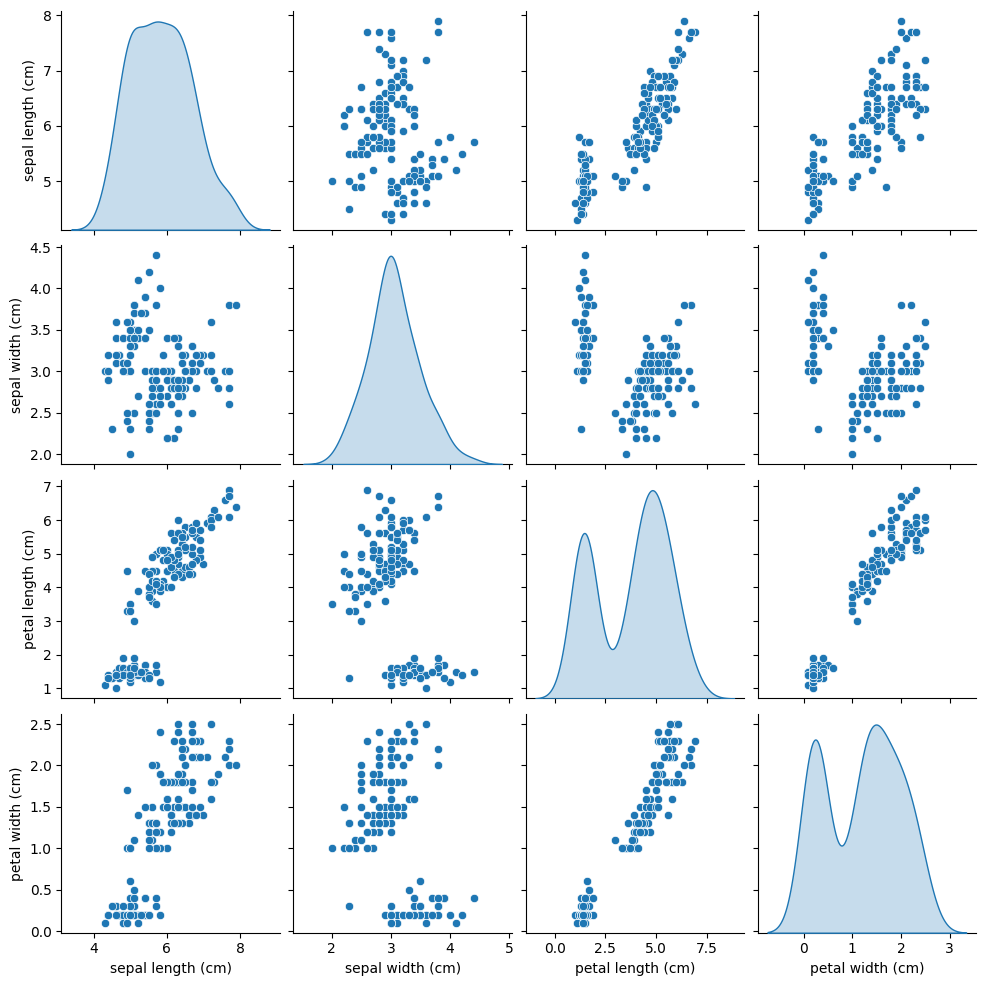

In [7]:
#ENTER YOUR CODE HERE
import seaborn
import matplotlib.pyplot as plt

seaborn.pairplot(df, diag_kind="kde")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

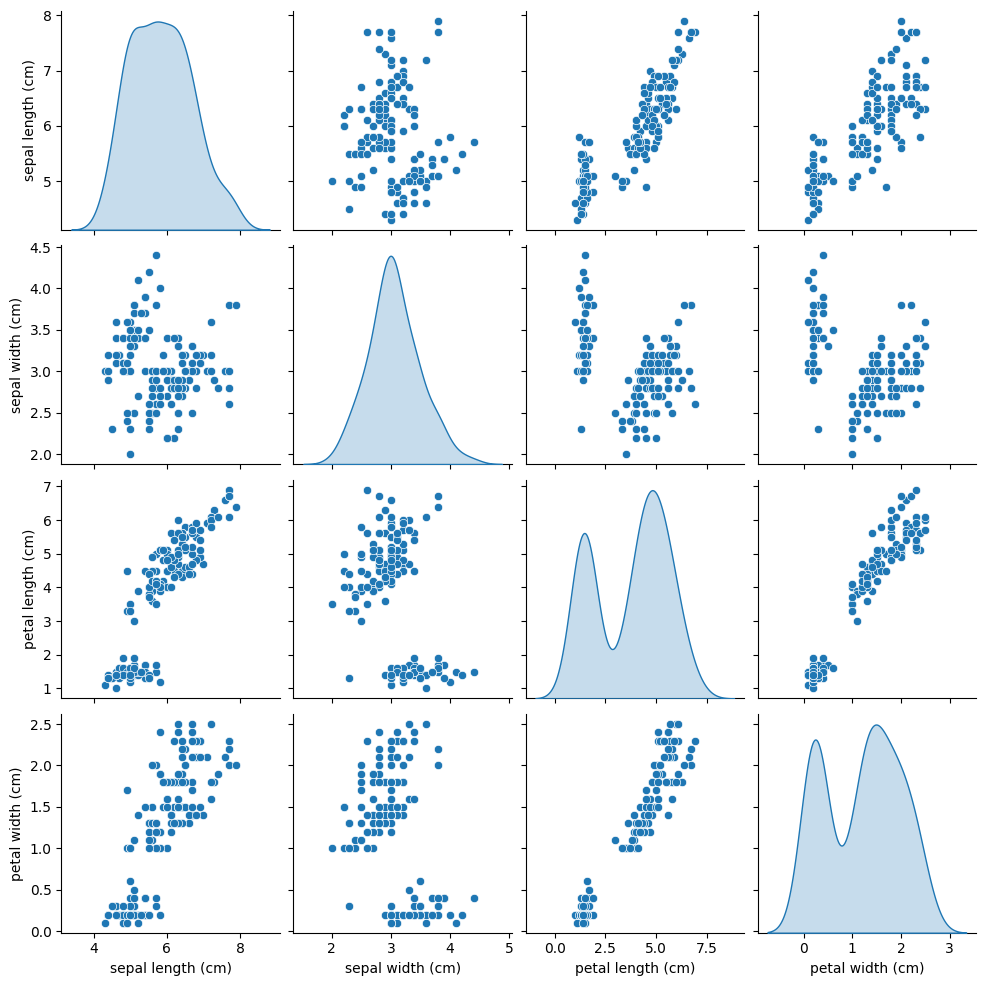

As apparent, there is no label assigned to these entries

**Therefore let us try to Cluster the data to see any similarities**

**Import KMeans from sklearn**

In [8]:
#ENTER YOUR CODE HERE
from sklearn.cluster import KMeans


**Perform K Means Clustering**

In [10]:
#ENTER YOUR CODE HERE
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto', random_state=0)

KMeans(n_clusters=3, n_init='auto', random_state=0)

**Add cluster labels to the DataFrame**

In [12]:
#ENTER YOUR CODE HERE
df['cluster']=kmeans.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


**Analyse the clusters, find the centers and the number of observations in each cluster**

In [15]:
#ENTER YOUR CODE HERE
print(kmeans.cluster_centers_)
print()
df['cluster'].value_counts()

[[5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]



cluster
2    61
0    50
1    39
Name: count, dtype: int64

**Visualise the cluster, make the plot again but this time with labels**

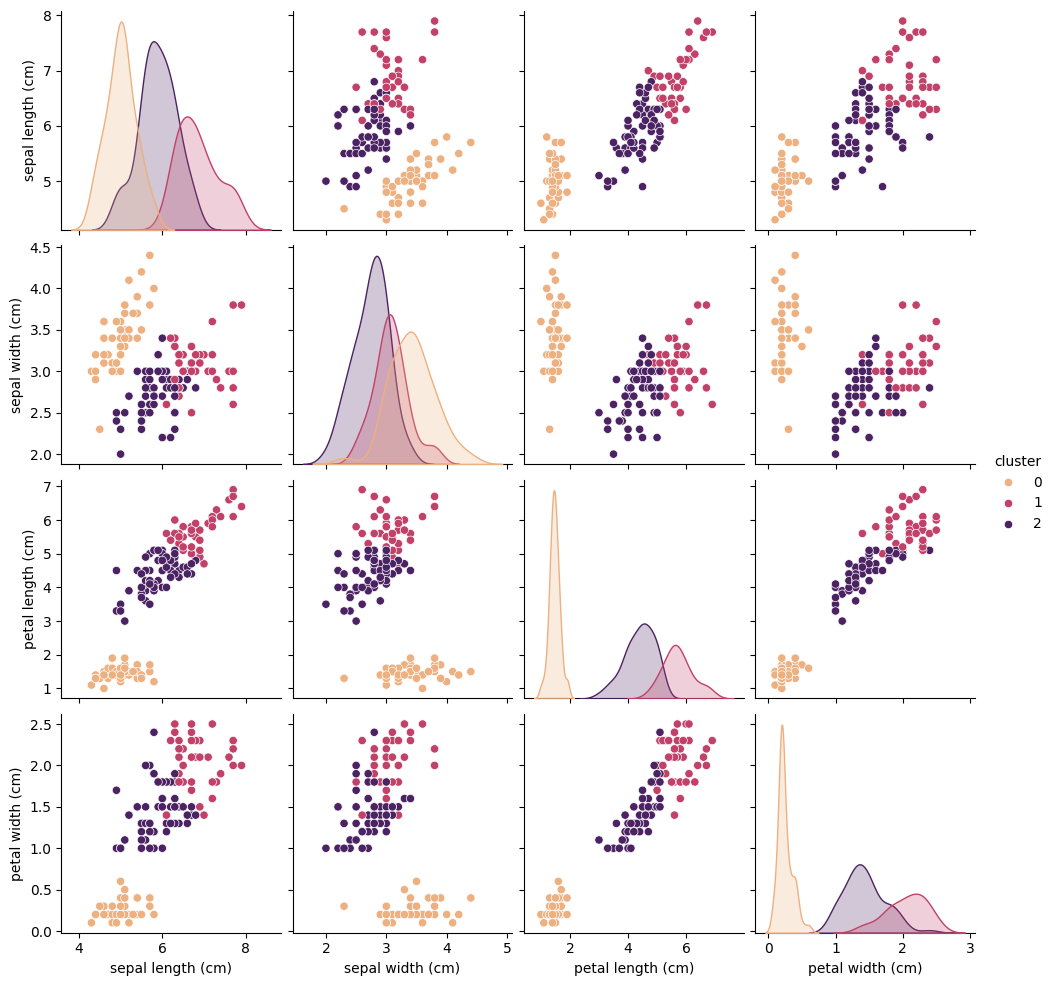

In [18]:
#ENTER YOUR CODE HERE
seaborn.pairplot(df, diag_kind="kde",hue='cluster',palette='flare')
plt.show()


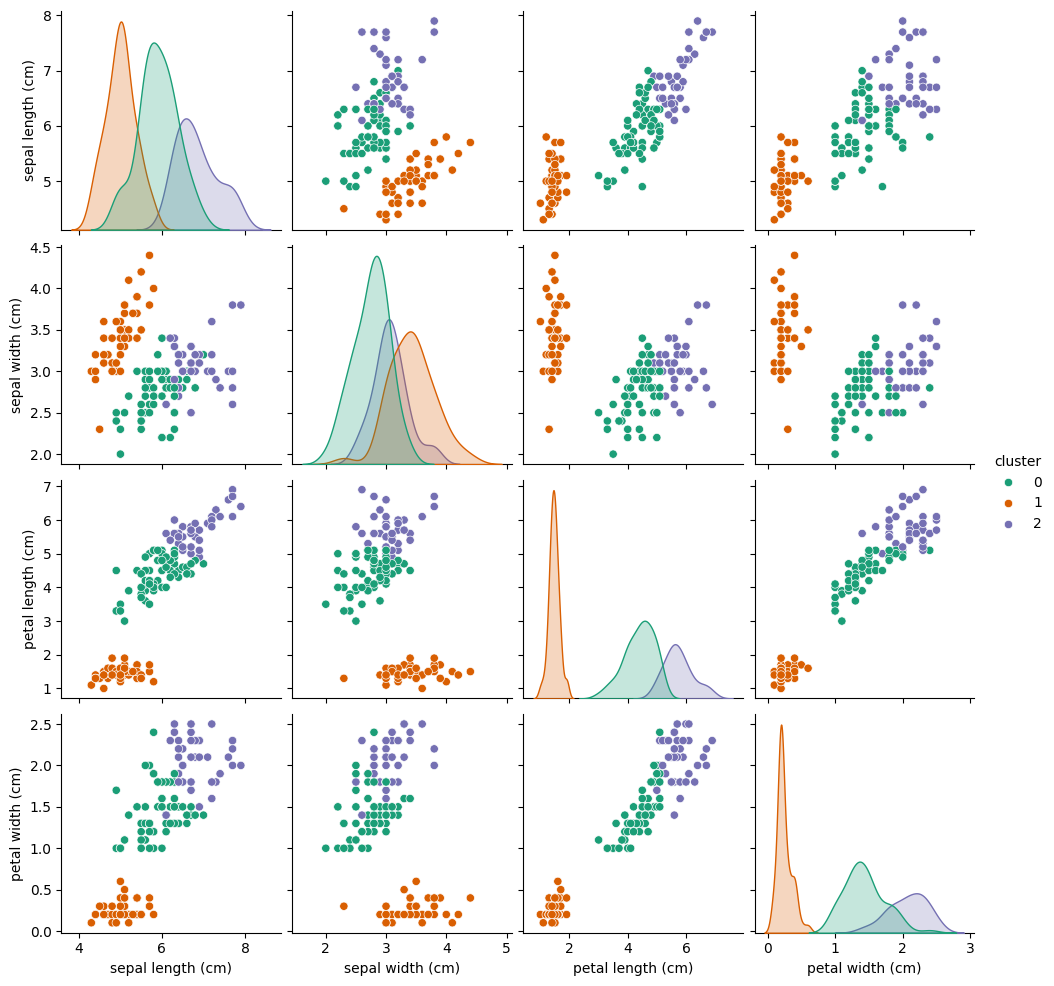

# GOOD JOB!